In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

from sklearn.neural_network import MLPClassifier

from yellowbrick.cluster import KElbowVisualizer

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.metrics.classification module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.metrics. Anything that cannot be imported from sklearn.metrics is now part of the private API.
  warnings.warn(message, FutureWarning)


In [ ]:
data = pd.read_csv('IMDb movies.csv')

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (3) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [ ]:
data.head(2)

,imdb_title_id,title,original_title,year,date_published,genre,duration,country,language,director,writer,production_company,actors,description,avg_vote,votes,budget,usa_gross_income,worlwide_gross_income,metascore,reviews_from_users,reviews_from_critics
0,tt0000009,Miss Jerry,Miss Jerry,1894,1894-10-09,Romance,45,USA,None,Alexander Black,Alexander Black,Alexander Black Photoplays,"Blanche Bayliss, William Courtenay, Chauncey D...",The adventures of a female reporter in the 1890s.,5.9,154,NaN,NaN,NaN,NaN,1.0,2.0
1,tt0000574,The Story of the Kelly Gang,The Story of the Kelly Gang,1906,1906-12-26,"Biography, Crime, Drama",70,Australia,None,Charles Tait,Charles Tait,J. and N. Tait,"Elizabeth Tait, John Tait, Norman Campbell, Be...",True story of notorious Australian outlaw Ned ...,6.1,589,$ 2250,NaN,NaN,NaN,7.0,7.0


In [ ]:
data.dtypes

imdb_title_id             object
title                     object
original_title            object
year                      object
date_published            object
genre                     object
duration                   int64
country                   object
language                  object
director                  object
writer                    object
production_company        object
actors                    object
description               object
avg_vote                 float64
votes                      int64
budget                    object
usa_gross_income          object
worlwide_gross_income     object
metascore                float64
reviews_from_users       float64
reviews_from_critics     float64
dtype: object

In [ ]:
df=data[['duration']].copy()

In [ ]:
df

,duration
0,45
1,70
2,53
3,100
4,68
...,...
85850,95
85851,103
85852,130
85853,98


In [ ]:
df['duration'].value_counts(normalize=True)

90     0.060125
95     0.037202
100    0.036177
92     0.028164
93     0.028117
         ...   
279    0.000012
301    0.000012
345    0.000012
729    0.000012
319    0.000012
Name: duration, Length: 266, dtype: float64

In [ ]:
null_values_per_variable = 100 * (df.isnull().sum()/df.shape[0]).round(3)#.reset_index()
null_values_per_variable.sort_values(ascending=False)

duration    0.0
dtype: float64

In [ ]:
def missing_values_table(df):
        # Total missing values
        mis_val = df.isnull().sum()
        
        # Percentage of missing values
        mis_val_percent = 100 * df.isnull().sum() / len(df)
        
        # Make a table with the results
        mis_val_table = pd.concat([mis_val, mis_val_percent], axis=1)
        
        # Rename the columns
        mis_val_table_ren_columns = mis_val_table.rename(
        columns = {0 : 'Missing Values', 1 : '% of Total Values'})
        
        # Sort the table by percentage of missing descending
        mis_val_table_ren_columns = mis_val_table_ren_columns[
            mis_val_table_ren_columns.iloc[:,1] != 0].sort_values(
        '% of Total Values', ascending=False).round(1)
        
        # Print some summary information
        print ("Your selected dataframe has " + str(df.shape[1]) + " columns.\n"      
            "There are " + str(mis_val_table_ren_columns.shape[0]) +
              " columns that have missing values.")
        
        # Return the dataframe with missing information
        return mis_val_table_ren_columns

In [ ]:
missing_values_table(df)

Your selected dataframe has 1 columns.
There are 0 columns that have missing values.


,Missing Values,% of Total Values


In [ ]:
scaler = StandardScaler()
dat = pd.DataFrame(scaler.fit_transform(df), columns=df.columns)

In [ ]:
dat

,duration
0,-2.454204
1,-1.345739
2,-2.099495
3,-0.015581
4,-1.434416
...,...
85850,-0.237274
85851,0.117434
85852,1.314576
85853,-0.104259


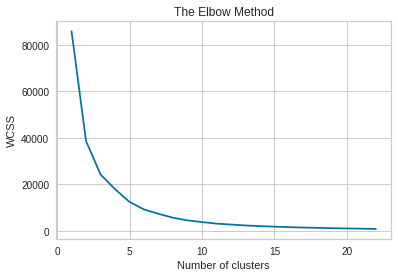

In [ ]:
# Using the elbow method to find the optimal number of clusters

from sklearn.cluster import KMeans
wcss =[]
for i in range (1,23):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', max_iter =300, n_init = 10, random_state = 0)
    kmeans.fit(dat)
    wcss.append(kmeans.inertia_)

# Plot the graph to visualize the Elbow Method to find the optimal number of cluster  
plt.plot(range(1,23),wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show() 

In [ ]:
n_cluster=range(1,23)
kmeans=[KMeans(n_clusters=i).fit(dat) for i in n_cluster]
scores=[kmeans[i].score(df) for i in range (len(kmeans))]

scores=np.array(scores)
dif_scores=scores/scores[0]
dif_scores=np.diff(dif_scores)
n_clusters=np.argwhere(dif_scores <np.quantile(dif_scores, 0.9))[-1][0]
print(n_cluster)

range(1, 23)


In [ ]:
preds=KMeans(n_clusters=n_clusters).fit_predict(dat)
print( preds[0])

9


In [ ]:
dat

,duration,ouliers
0,-2.454204,9
1,-1.345739,5
2,-2.099495,9
3,-0.015581,6
4,-1.434416,5
...,...,...
85850,-0.237274,6
85851,0.117434,2
85852,1.314576,13
85853,-0.104259,6


In [ ]:
train=pd.DataFrame(dat)
train['cluster']=preds
outliers =[
           x
           for x in zip(
               train['cluster'].value_counts().iloc[-2:].index,
               train['cluster'].value_counts().iloc[-2:].values,
           )
]

In [ ]:
train['cluster'].value_counts()

0     18111
6     17937
2     14359
12    11163
7      7021
5      4989
13     4199
1      2989
9      2344
11     1790
3       739
8       158
4        48
10        8
Name: cluster, dtype: int64

In [ ]:
outliers

[(4, 48), (10, 8)]

In [ ]:
clusters=[
          x[0]
          for x in outliers
          if x[1] < np.quantile(train['cluster'].value_counts().values, 0.01)
]

In [ ]:
clusters

[10]

In [ ]:
train[train.cluster == 10]

,duration,ouliers,cluster
38038,27.873392,10,10
39346,21.266942,10,10
46153,19.493398,10,10
50674,19.493398,10,10
53877,19.493398,10,10
54835,20.823556,10,10
75922,17.054776,10,10
85057,31.376140,10,10


In [ ]:
train['duration'].describe()

count    8.585500e+04
mean    -5.107996e-16
std      1.000006e+00
min     -2.631558e+00
25%     -5.476445e-01
50%     -1.929357e-01
75%      3.391273e-01
max      3.137614e+01
Name: duration, dtype: float64

In [ ]:
# Applying KMeans to the dataset with the optimal number of cluster

kmeans=KMeans(n_clusters= 7, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
Y_Kmeans = kmeans.fit_predict(train)

In [ ]:
train=train.values

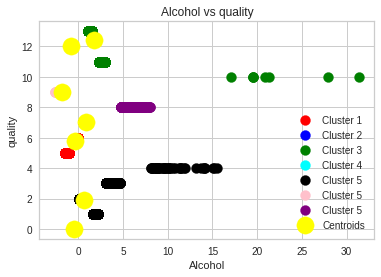

In [ ]:
# Visualising the clusters

plt.scatter(train[Y_Kmeans == 0, 0], train[Y_Kmeans == 0,1],s = 100, c='red', label = 'Cluster 1')

plt.scatter(train[Y_Kmeans == 1, 0], train[Y_Kmeans == 1,1],s = 100, c='blue', label = 'Cluster 2')

plt.scatter(train[Y_Kmeans == 2, 0], train[Y_Kmeans == 2,1],s = 100, c='green', label = 'Cluster 3')

plt.scatter(train[Y_Kmeans == 3, 0], train[Y_Kmeans == 3,1],s = 100, c='cyan', label = 'Cluster 4')

plt.scatter(train[Y_Kmeans == 4, 0], train[Y_Kmeans == 4,1],s = 100, c='black', label = 'Cluster 5')

plt.scatter(train[Y_Kmeans == 5, 0], train[Y_Kmeans == 5,1],s = 100, c='pink', label = 'Cluster 5')

plt.scatter(train[Y_Kmeans == 6, 0], train[Y_Kmeans == 6,1],s = 100, c='purple', label = 'Cluster 5')

plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1], s = 300, c = 'yellow', label = 'Centroids')
    
plt.title('Alcohol vs quality')
plt.xlabel('Alcohol')
plt.ylabel('quality')
plt.legend()
plt.show()